In [422]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [423]:
import numpy as np

# Load Image and Convert to Numpy Array



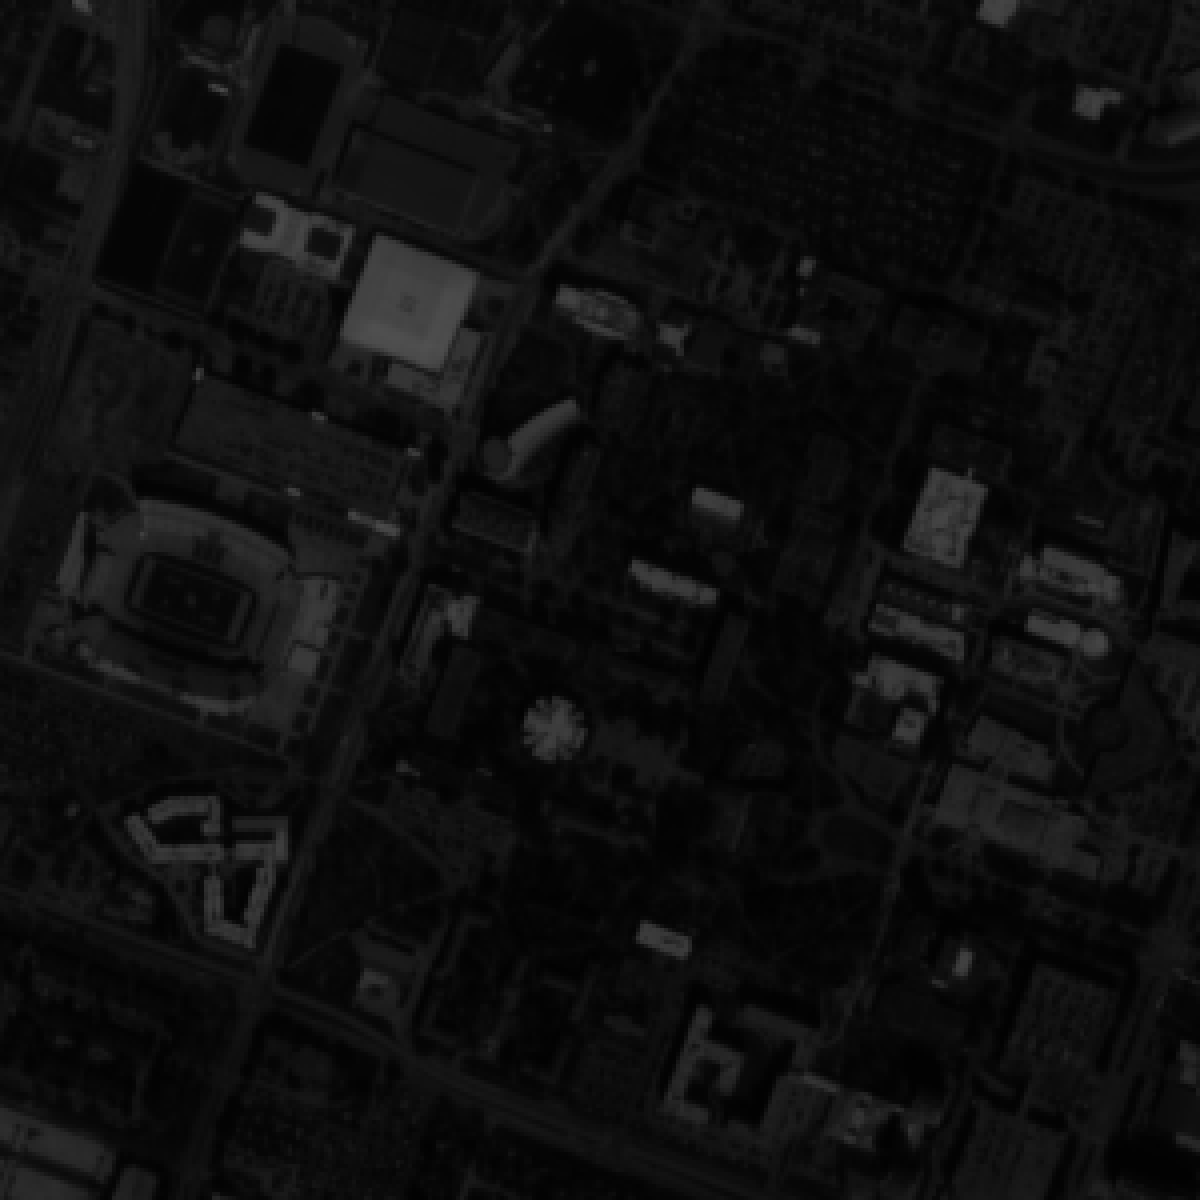

In [424]:
from PIL import Image
path = "gdrive/My Drive/RS21/Assignment1/"
red = Image.open(path + "lr_red.tif")
# Resize to 1200 * 1200
red_in = red.resize((red.width * 4, red.height * 4), resample = Image.NEAREST)
red_in

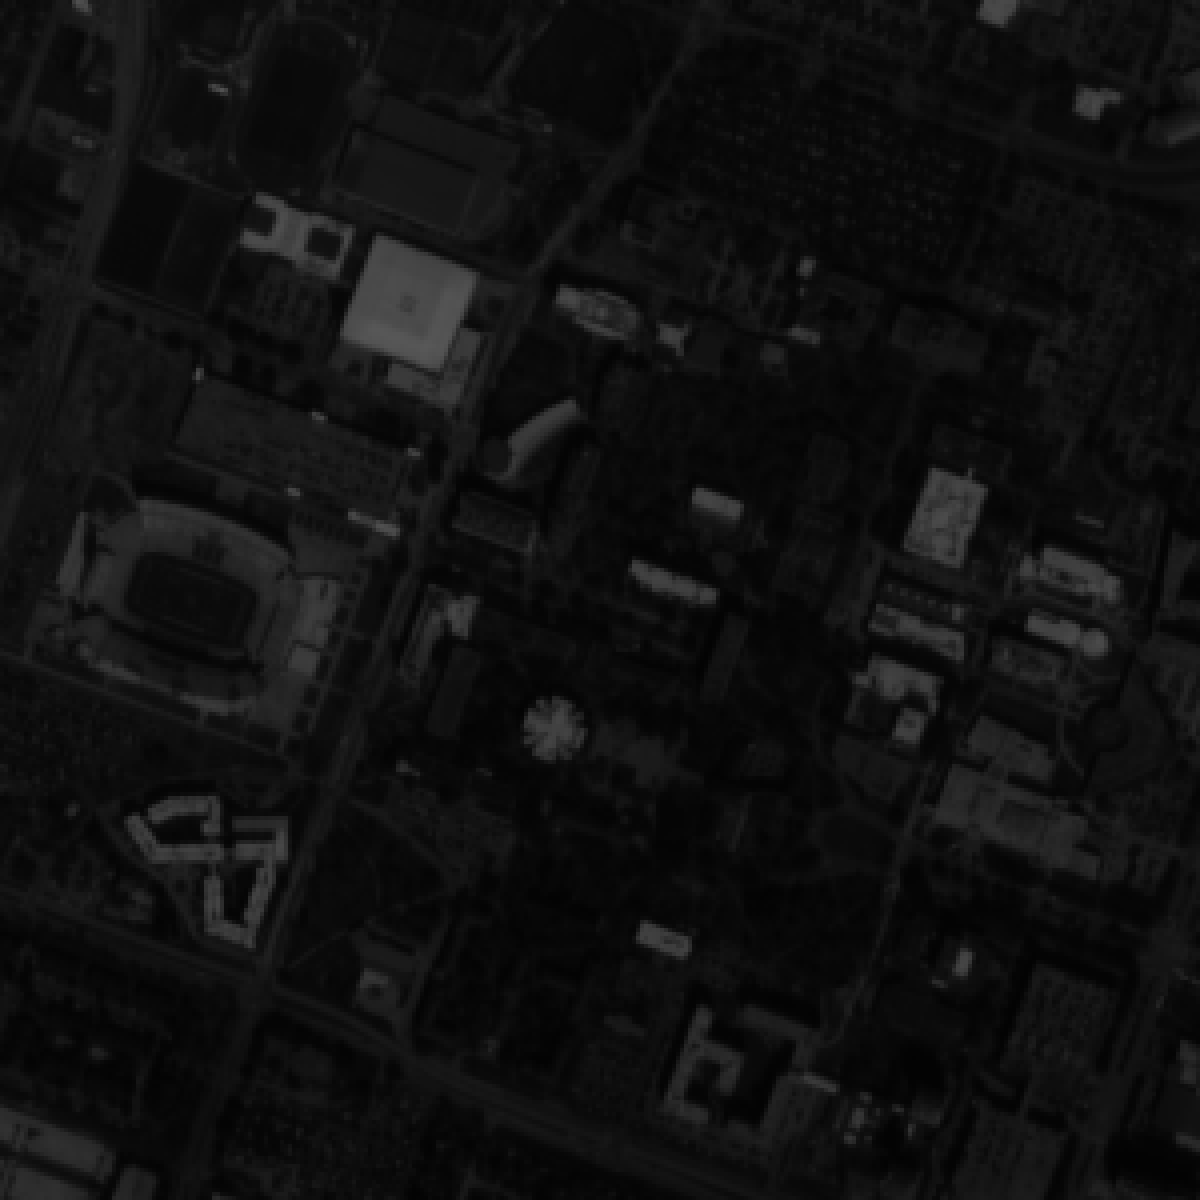

In [425]:
green = Image.open(path + "lr_green.tif")
green_in = green.resize((green.width * 4, green.height * 4), resample = Image.NEAREST)
green_in

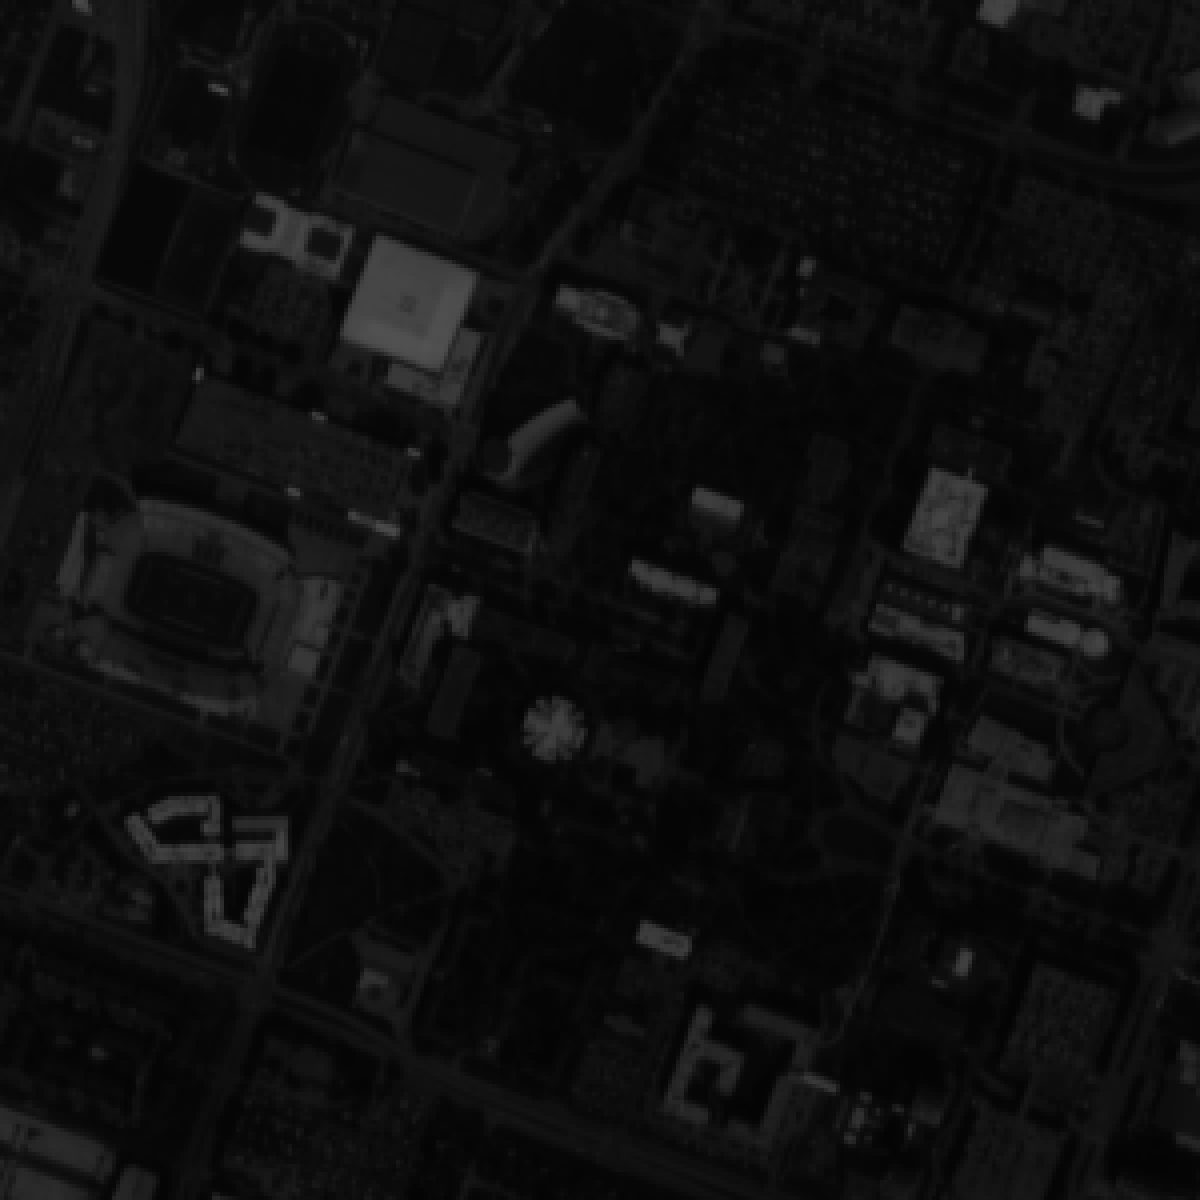

In [426]:
blue = Image.open(path + "lr_blue.tif")
blue_in = blue.resize((blue.width * 4, blue.height * 4), resample = Image.NEAREST)
blue_in

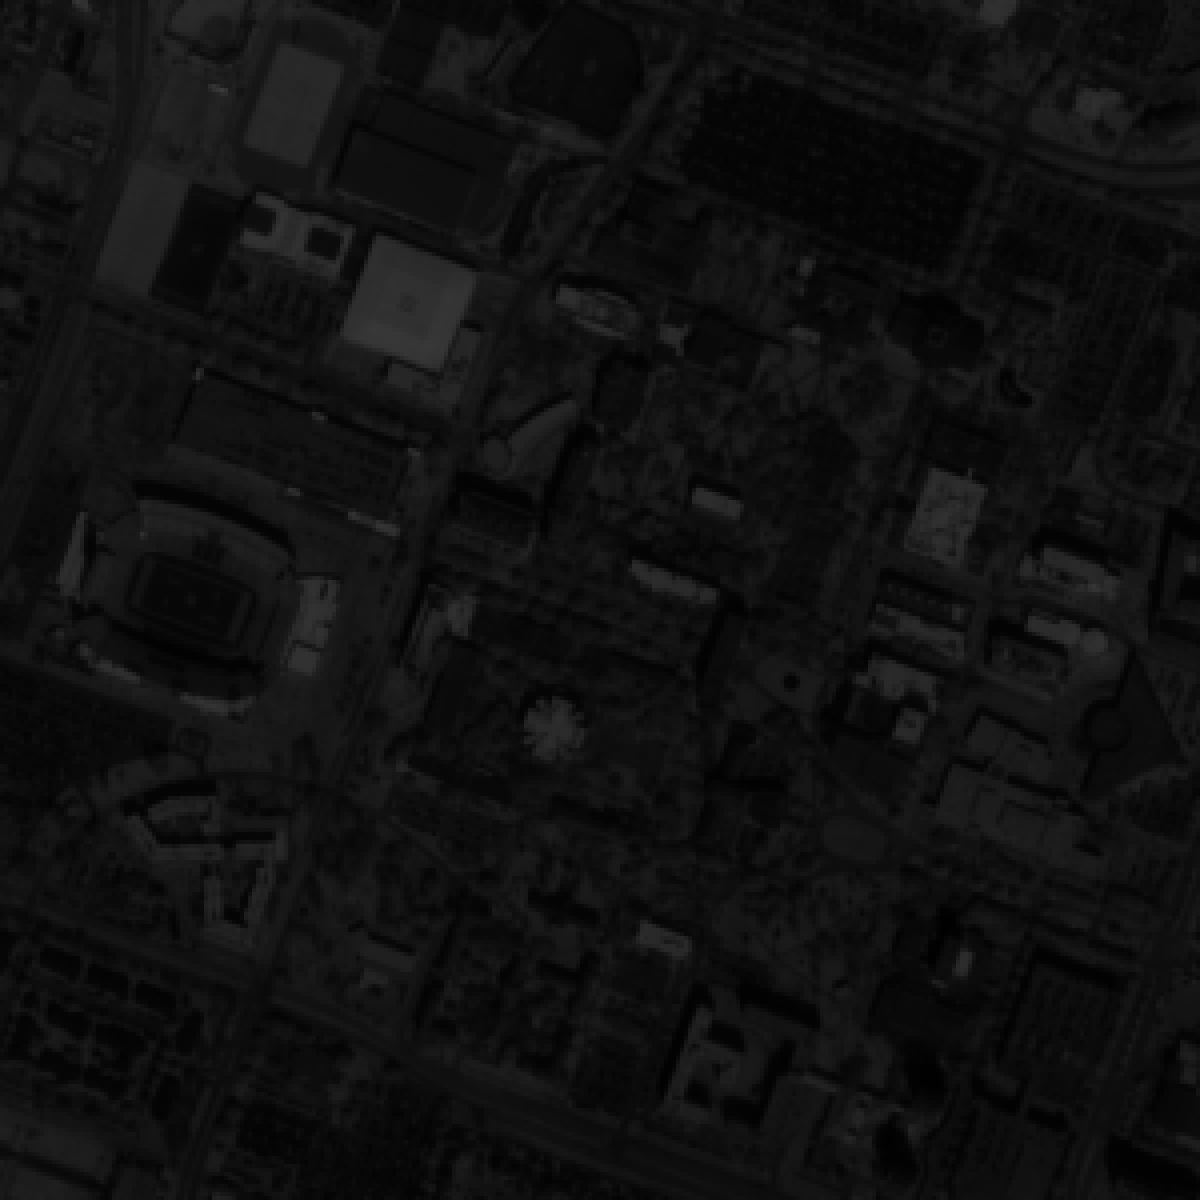

In [427]:
nir = Image.open(path + "lr_nir.tif")
nir_in = nir.resize((nir.width * 4, nir.height * 4), resample = Image.NEAREST)
nir_in

In [428]:
pan_in = Image.open(path + "pan.tif")
pan_in

Output hidden; open in https://colab.research.google.com to view.

In [429]:
arr_red_in = np.array(red_in)
arr_red_in

array([[2776, 2776, 2776, ..., 6107, 6107, 6107],
       [2776, 2776, 2776, ..., 6107, 6107, 6107],
       [2776, 2776, 2776, ..., 6107, 6107, 6107],
       ...,
       [8242, 8242, 8242, ..., 3779, 3779, 3779],
       [8242, 8242, 8242, ..., 3779, 3779, 3779],
       [8242, 8242, 8242, ..., 3779, 3779, 3779]], dtype=uint16)

In [430]:
arr_red_in.ndim

2

In [431]:
arr_red_in.shape

(1200, 1200)

In [432]:
arr_green_in = np.array(green_in)
arr_green_in

array([[3182, 3182, 3182, ..., 6390, 6390, 6390],
       [3182, 3182, 3182, ..., 6390, 6390, 6390],
       [3182, 3182, 3182, ..., 6390, 6390, 6390],
       ...,
       [8547, 8547, 8547, ..., 4220, 4220, 4220],
       [8547, 8547, 8547, ..., 4220, 4220, 4220],
       [8547, 8547, 8547, ..., 4220, 4220, 4220]], dtype=uint16)

In [433]:
arr_blue_in = np.array(blue_in)
arr_blue_in

array([[3101, 3101, 3101, ..., 5501, 5501, 5501],
       [3101, 3101, 3101, ..., 5501, 5501, 5501],
       [3101, 3101, 3101, ..., 5501, 5501, 5501],
       ...,
       [7651, 7651, 7651, ..., 4105, 4105, 4105],
       [7651, 7651, 7651, ..., 4105, 4105, 4105],
       [7651, 7651, 7651, ..., 4105, 4105, 4105]], dtype=uint16)

In [434]:
arr_nir_in = np.array(nir_in)
arr_nir_in

array([[2383, 2383, 2383, ..., 4980, 4980, 4980],
       [2383, 2383, 2383, ..., 4980, 4980, 4980],
       [2383, 2383, 2383, ..., 4980, 4980, 4980],
       ...,
       [6266, 6266, 6266, ..., 3176, 3176, 3176],
       [6266, 6266, 6266, ..., 3176, 3176, 3176],
       [6266, 6266, 6266, ..., 3176, 3176, 3176]], dtype=uint16)

In [435]:
arr_pan_in = np.array(pan_in)
arr_pan_in

array([[2278, 2278, 2553, ..., 5670, 5183, 5031],
       [2514, 2514, 2827, ..., 6344, 6102, 5774],
       [2829, 2829, 3080, ..., 6028, 5655, 5432],
       ...,
       [9767, 8757, 7158, ..., 2754, 4325, 5708],
       [9750, 8208, 6846, ..., 2952, 4803, 6101],
       [9250, 7475, 6408, ..., 3451, 5288, 6368]], dtype=uint16)

In [436]:
arr_pan_in.ndim

2

In [437]:
arr_pan_in.shape

(1200, 1200)

## Weighted Brovey Algorithm

### Calculating DNF
https://pro.arcgis.com/en/pro-app/latest/help/analysis/raster-functions/fundamentals-of-pan-sharpening-pro.htm

DNF = (P - IW * I) / (RW * R + GW * G + BW * B)

In [438]:
weights = {'nir': 0.25, 'red': 0.25, 'green': 0.25, 'blue': 0.25}

In [439]:
def calculate_dnf(weights, arr_pan_in, arr_red_in, arr_green_in, arr_blue_in, arr_nir_in):
  dnf_dividend = arr_pan_in - weights['nir'] * arr_nir_in
  dnf_divider = weights['red'] * arr_red_in + weights['green'] * arr_green_in + weights['blue'] * arr_blue_in
  dnf = dnf_dividend / dnf_divider
  return dnf

### Generate Higher Res Image


*   Red_out  = R * DNF
*   Green_out = G * DNF
*   Blue_out = B * DNF
*   Infrared_out = I * DNF

In [440]:
def generate_higher_res(dnf, arr_red_in, arr_green_in, arr_blue_in, arr_nir_in):
  arr_red_out = np.multiply(arr_red_in, dnf).astype(np.uint16)
  arr_green_out = np.multiply(arr_green_in, dnf).astype(np.uint16)
  arr_blue_out = np.multiply(arr_blue_in, dnf).astype(np.uint16)
  arr_nir_out = np.multiply(arr_nir_in, dnf).astype(np.uint16)
  return arr_red_out, arr_green_out, arr_blue_out, arr_nir_out

### Run Iterations


In [441]:
def run_iter(num_iter, weights, arr_pan_in, arr_red_in, arr_green_in, arr_blue_in, arr_nir_in):
  arr_red_out = None
  arr_green_out = None
  arr_blue_out = None
  arr_nir_out = None
  for i in range(num_iter):
    dnf = calculate_dnf(weights, arr_pan_in, arr_red_in, arr_green_in, arr_blue_in, arr_nir_in)
    arr_red_in, arr_green_in, arr_blue_in, arr_nir_in = generate_higher_res(dnf, arr_red_in, arr_green_in, arr_blue_in, arr_nir_in)
    arr_red_out = arr_red_in
    arr_green_out = arr_green_in
    arr_blue_out = arr_blue_in
    arr_nir_out = arr_nir_in
  return arr_red_out, arr_green_out, arr_blue_out, arr_nir_out


In [442]:
arr_red_out, arr_green_out, arr_blue_out, arr_nir_out = run_iter(2, weights, arr_pan_in, arr_red_in, arr_green_in, arr_blue_in, arr_nir_in)

In [443]:
arr_red_out

array([[ 2250,  2250,  2498, ...,  6033,  5555,  5406],
       [ 2463,  2463,  2745, ...,  6695,  6458,  6136],
       [ 2748,  2748,  2974, ...,  6385,  6019,  5800],
       ...,
       [10338,  9325,  7722, ...,  2796,  4243,  5518],
       [10322,  8774,  7408, ...,  2980,  4684,  5879],
       [ 9820,  8040,  6969, ...,  3439,  5131,  6126]], dtype=uint16)

In [444]:
arr_green_out

array([[ 2578,  2578,  2863, ...,  6314,  5813,  5657],
       [ 2823,  2823,  3147, ...,  7006,  6757,  6419],
       [ 3149,  3149,  3409, ...,  6681,  6298,  6069],
       ...,
       [10722,  9670,  8007, ...,  3123,  4739,  6162],
       [10703,  9100,  7683, ...,  3327,  5231,  6566],
       [10184,  8337,  7227, ...,  3840,  5730,  6841]], dtype=uint16)

In [445]:
arr_blue_out

array([[2513, 2513, 2790, ..., 5434, 5004, 4870],
       [2751, 2751, 3068, ..., 6030, 5817, 5527],
       [3069, 3069, 3322, ..., 5751, 5422, 5224],
       ...,
       [9597, 8657, 7168, ..., 3038, 4610, 5994],
       [9581, 8146, 6878, ..., 3236, 5089, 6387],
       [9116, 7463, 6469, ..., 3735, 5574, 6654]], dtype=uint16)

In [446]:
arr_nir_out

array([[1931, 1931, 2144, ..., 4920, 4530, 4409],
       [2114, 2114, 2356, ..., 5460, 5265, 5003],
       [2358, 2358, 2552, ..., 5206, 4908, 4730],
       ...,
       [7860, 7090, 5870, ..., 2351, 3567, 4637],
       [7847, 6671, 5632, ..., 2503, 3937, 4942],
       [7465, 6112, 5299, ..., 2890, 4312, 5148]], dtype=uint16)

In [447]:
red_out_im = Image.fromarray(arr_red_out)
red_out_im

Output hidden; open in https://colab.research.google.com to view.

In [448]:
red_out_im.save(path + 'Weighted_Brovey_Pro_Iter/red.tif')

In [449]:
green_out_im = Image.fromarray(arr_green_out)
green_out_im

Output hidden; open in https://colab.research.google.com to view.

In [450]:
green_out_im.save(path + 'Weighted_Brovey_Pro_Iter/green.tif')

In [451]:
blue_out_im = Image.fromarray(arr_blue_out)
blue_out_im

Output hidden; open in https://colab.research.google.com to view.

In [452]:
blue_out_im.save(path + 'Weighted_Brovey_Pro_Iter/blue.tif')

In [453]:
nir_out_im = Image.fromarray(arr_nir_out)
nir_out_im

Output hidden; open in https://colab.research.google.com to view.

In [454]:
nir_out_im.save(path + 'Weighted_Brovey_Pro_Iter/nir.tif')

Notes:
1. Number of iterations is decided empirically
2. Iteration number > 2 leads to more visible image artifacts (white dots on the pan-sharpened images)  